**Title:** Influence of Land Use Policy on Carbon Emissions in Canada

**Introduction:** Canada has made a national priority to comply with its commitment regarding the reduction of carbon emissions while climate change effects emerge as a critical global concern. Land use policy has been identified by scholars as a one of the main factors inflecting carbon emissions. As Canada has been undergoing huge geographical changes in the last three decades, we aim to study the influence of land use variations on Canada’s and Provinces’ carbon emissions in order to assess the potential impact of various land use policy changes.

**Dataset:** We will use the "Carbon Emissions of Canada and Provinces for the Last 30 Years" dataset, whose the terms of utilisation fall under the Open Government License Canada (https://open.canada.ca/en/open-government-licence-canada). 

**Preliminary Exploratory Data Analysis:** We will be using R for our analysis. We wrangled the data by using pivot_wider and renaming several columns in order to make the datatset tidy. We are going to focus primarily  on carbon emissions variables, carbon emissions by economic sectors, and land use data, surely getting rid of columns such as “meaurements units”, “sub-sectors” or the gas times informations. To conduct exploratory data analysis, we will create visualizations, such as line plots ('geom_lines') and smoothed trendlines ('geom_smooth') to understand historical trends in emissions and the relationship between land use policy and emissions.

**Methods:** We will use regression modeling (k-algorithm) trained on historical data since 1990 to predict future emissions based, therefore showing the possible impact of land-use policies on carbon emissions. To reach this goal, we will nead to create a new tibble showing the relations between land use (data stored in the file : “EN_Ch6_Tables_FullTimeSeries” accessible on the Canada government website) and carbon emission. We may also consider time-series analysis to capture temporal patterns in emissions data. Visualizations will be used to effectively communicate our results.

**Expected Outcomes and Significance:** We expect that our analysis will show the significant influence of land use policies on carbon emissions in Canadian provinces over the past 30 years. By predicting future emissions, we anticipate to assess the potential impact of different land use policies, highlighting the importance of sustainable land management, such as preserving wetlands and forests. Moreover, our analysis may entail further questions about the impact of carbon emissions on the socio-economic effects of these land changes, especially those impacting indigenous communities. Studying the impact of land use policies on carbon emissions in Canadian provinces and its potential consequences could actually be a small contribution to addressing the climate change challenge.


1. **`library(repr)`**: The `repr` package provides options for setting the size of plots and other graphical outputs in Jupyter notebooks and other interactive computing environments.

2. **`library(tidyverse)`**: The `tidyverse` is a collection of R packages designed for data science. It includes packages like `ggplot2` for data visualization, `dplyr` for data manipulation, `tidyr` for tidying data, and more.

3. **`library(tidymodels)`**: The `tidymodels` package is a collection of packages for modeling and machine learning using tidyverse principles. It provides a consistent and easy-to-use interface for building and evaluating models.

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

**Loading Data: A CSV file named "EN_GHG_Econ_Can_Prov_Terr.csv", located within the "Data" directory, is read and its contents are stored in a data frame called Emission_data.**

In [24]:
Emission_data <- read.csv("Data/EN_GHG_Econ_Can_Prov_Terr.csv")

1. **Load Data and Convert `CO2eq` to Numeric**: The data from `Emission_data` is accessed, and the `CO2eq` column is converted to numeric type. This is important if `CO2eq` was read as a character or factor due to commas or other formatting issues in the original data.


2. **Select Relevant Columns**: Only the `Year`, `Region`, and `CO2eq` columns are retained for further analysis.


3. **Reshape Data with `pivot_wider`**: The data is transformed from long to wide format, spreading the regions across columns, summing the `CO2eq` values for each combination of `Year` and `Region`.


4. **Rename Column**: The `Canada` column is renamed to `Total`.


5. **Filter Out NA Years**: Rows with NA values in the `Year` column are removed.


6. **Convert `Year` to Integer**: The `Year` column is converted to integer type.


7. **Group by Year and Summarize**: The data is grouped by `Year`, and the sum is calculated for each numeric column within each group.


8. **View Result**: The first six rows of the transformed data are displayed.

In [30]:
data <- Emission_data|>
mutate(CO2eq = as.numeric(CO2eq))|>
select(Year, Region, CO2eq) |>
pivot_wider(names_from = Region,
              values_from = CO2eq,
              values_fn = list(CO2eq = sum))|>
rename(Total = Canada) |>
filter(!is.na(Year)) |>
  mutate(Year = as.integer(Year)) |>
  group_by(Year) |>
  summarise(across(where(is.numeric), sum, na.rm = TRUE))
head(data)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `CO2eq = as.numeric(CO2eq)`.
Caused by warning:
! NAs introduced by coercion”


Year,Total,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut,Northwest Territories and Nunavut
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1990,1913.667,30.23093,5.675233,54.05539,46.73104,278.5439,561.0364,59.83943,137.7409,560.7634,170.9726,1.759440,6.318116,0,6.318116
1991,1888.984,27.34642,5.539589,52.72486,45.17279,264.4859,554.5510,58.98227,143.1189,562.5093,166.7917,1.675079,6.086117,0,6.086117
1992,1949.727,26.75709,5.533567,53.93321,46.93312,265.1469,568.3918,60.27252,162.8728,588.9102,163.4012,2.147101,5.427917,0,5.427917
1993,1978.542,27.58909,5.530312,54.23741,45.91018,270.4224,549.6321,60.62993,176.6394,609.0703,170.6404,1.796402,6.443878,0,6.443878
1994,2048.619,24.82224,5.640466,52.70268,49.24173,277.8692,559.2486,62.49692,188.1334,637.7210,182.0549,1.765119,6.922798,0,6.922798
1995,2106.524,27.59750,5.663862,52.97859,50.03038,273.6274,572.2880,64.66163,196.8101,657.2480,196.5207,2.005848,7.091989,0,7.091989



1. **Create a Base Plot**: Use the `ggplot` function to create a base plot, specifying `data` as the data frame to use and `aes(x = Year, y = Total)` to define the aesthetics. This tells `ggplot` to put `Year` on the x-axis and `Total` on the y-axis.


2. **Add a Line Geom**: Add a line geometry to the plot to connect the data points, which is suitable for time series data.


3. **Add Labels**: Add labels to the x-axis and y-axis using `labs`.


4. **Store the Plot**: Store the plot in a variable named `emission_plot`.


5. **Display the Plot**: Finally, display the plot. Just typing the variable name `emission_plot` and running the line will display the plot in R.

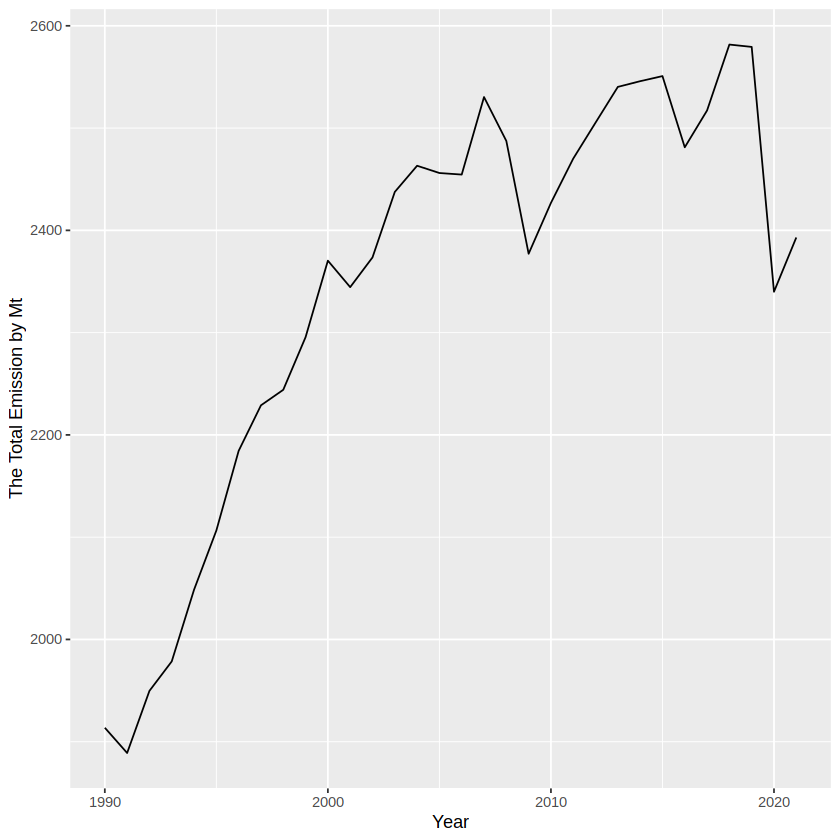

In [31]:
emission_plot <- ggplot(data,aes(x = Year, y = Total)) +
  geom_line() +
  labs(x = "Year", y = "The Total Emission by Mt")

emission_plot

In [1]:
# test